# School Districts

The Census Bureau collects school district boundaries to develop annual estimates of children in poverty to help the U.S. Department of Education determine the annual allocation of Title I funding to states and school districts. NCES also uses the school district boundaries to develop a broad collection of district-level demographic estimates from the Census Bureau’s American Community Survey. The Census Bureau annually updates school district boundaries, names, local education agency codes, grade ranges, and school district levels based on information provided by state education officials.

School district shapefiles comes from the Education Demographic and Geographic Statistics (EDGE), published by the National Center of Education Statistics (NCES), a center housed by the Institute of Education Sciences (IES). The center publishes data years going back to 1995. 

The original download links can be found [at the EDGE webpage of the NCES website](https://nces.ed.gov/programs/edge/Geographic/DistrictBoundaries), *available as a single composite file or divided into separate files for **Primary, Secondary, or Unified** districts*.

The school district are also available to download through Census (TIGER/Line)'s website, but after a brief investigation we found that there were no geometrical differences in the files, but that some of the districts seemed to have been renamed or reclassified (as in from being an elementary district to a unified district).

[Documentation PDF from NCES can be found here](https://nces.ed.gov/programs/edge/docs/EDGE_SDBOUNDARIES_COMPOSITE_FILEDOC.pdf)

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_column', 200)

In [3]:
import gdown 
# creates error by writing extra lines on the file after downloading from google drive

#url = 'https://drive.google.com/drive/folders/1CSoQL3VQ9FpjGpFYu8N8i3HVJ8CjGmEZ'
#output = 'us_sabins_01_0910.parquet'
#gdown.download(url, output, quiet=False)

#md5 = '1gAwOuGAgip3Ktpwzi5ZD_1sTOOSdN4rA'
#gdown.cached_download(url, output, postprocess=gdown.extractall)

#sabins = gpd.read_parquet(output)

### Look at year 15-16 first.

In [4]:
districts1516 = gpd.read_parquet('../../../data/NCES/districts/districts_1516.parquet')

In [7]:
districts1516.head()

,STATEFP,GEOID,NAME,LSAD,LOGRADE,HIGRADE,MTFCC,SDTYP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,ELSDLEA,UNSDLEA,SCSDLEA,geometry
0,04,0400082,Colorado River Union High School District,00,09,12,G5410,None,E,2.711174e+09,74672820.0,+35.1052137,-114.4678343,None,None,00082,"POLYGON ((-114.48403 35.67650, -114.48298 35.6..."
1,04,0400450,Agua Fria Union High School District,00,09,12,G5410,None,E,2.446409e+08,740286.0,+33.4814273,-112.4078710,None,None,00450,"POLYGON ((-112.41212 33.55171, -112.41083 33.5..."
2,04,0400720,Antelope Union High School District,00,09,12,G5410,None,E,7.937908e+09,3400.0,+32.9920489,-113.8173717,None,None,00720,"POLYGON ((-113.98419 33.46466, -113.97106 33.4..."
3,04,0401160,Bicentennial Union High School District,00,09,12,G5410,None,E,9.842287e+09,22988821.0,+33.6694969,-113.9521527,None,None,01160,"POLYGON ((-113.33638 34.31750, -113.33563 34.3..."
4,04,0401410,Buckeye Union High School District,00,09,12,G5410,None,E,3.167017e+09,214246.0,+33.3198987,-112.8117940,None,None,01410,"POLYGON ((-113.25997 33.55159, -113.24536 33.5..."


`GEOID` in this case is a combination of the state fips code and the Local Education Agency's (LEA) NCES number. You can index a data set of schools to a specific district by querying for the first 7 digits to match this `GEOID` number. 

In [10]:
districts1516.STATEFP[0] # state fips

'04'

In [11]:
districts1516.SCSDLEA[0] # school lea number

'00082'

In [9]:
districts1516.GEOID[0] # combined GEOID: 2 out of 3 parts of NCESSCH ID

'0400082'

In [12]:
ca = districts1516.loc[districts1516['STATEFP'] == '06']

<AxesSubplot:>

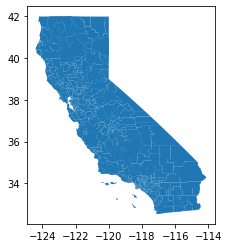

In [13]:
ca.plot()

### look at older data year

In [5]:
districts0910 = gpd.read_parquet('../../../data/NCES/districts/us_school_districts_2010.parquet')

In [15]:
districts0910.head()

,state,lea,name,lowgrade,highgrade,geometry
0,04,01160,Bicentennial Union High School District,09,12,"POLYGON ((720962.240 3703206.709, 721013.420 3..."
1,04,00720,Antelope Union High School District,09,12,"POLYGON ((841438.948 3688741.414, 841448.425 3..."
2,04,09630,Yuma Union High School District,09,12,"POLYGON ((746081.833 3583866.521, 745900.965 3..."
3,04,05070,Mingus Union High School District,09,12,"POLYGON ((939624.924 3850402.965, 939610.747 3..."
4,04,01740,Casa Grande Union High School District,09,12,"POLYGON ((1003438.853 3655665.920, 1003461.906..."


In [16]:
ca10 = districts0910.loc[districts0910['state'] == '06']

<AxesSubplot:>

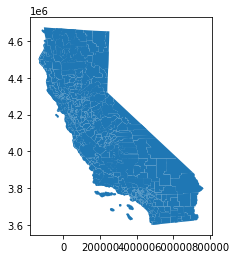

In [18]:
ca10.plot()